In [24]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import sympy as sym
import math

from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))  
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [22]:
raitings_list = raitings.tolist() # ndarray to list

for x in raitings_list:
    x_length = np.linalg.norm(x)
    cosin_list = []
    
    for y in raitings_list:
        y_length = np.linalg.norm(y)
        
        if x_length != y_length:
            cosin_list.append((np.dot(x,y))/(x_length*y_length))
        else:
            pass
        
    print('x:',raitings_list.index(x),', y:', raitings_list.index(raitings_list[cosin_list.index(max(cosin_list))]),'\n')

x: 0 , y: 7 

x: 1 , y: 3 

x: 2 , y: 8 

x: 3 , y: 8 

x: 4 , y: 7 

x: 5 , y: 8 

x: 6 , y: 3 

x: 7 , y: 5 

x: 8 , y: 0 

x: 9 , y: 2 



b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Возможно, для сжатия матрицы можно использовать сингулярное разложение

In [57]:
np.linalg.matrix_rank(raitings) # ранг матрицы

10

In [58]:
U,s,V = np.linalg.svd(raitings) #сингулярное разложение

In [59]:
np.shape(U)

(10, 10)

In [60]:
np.shape(s)

(10,)

In [61]:
np.shape(V)

(15, 15)

Исходную матрицу удалось только разложить, но не сжать

### Задание 2
Вычислите производную  в точке x0 = 1  (на python и на бумаге).

1. python

In [210]:
x = sym.Symbol('x')

In [221]:
(sym.tan(sym.sin(x) + sym.cos((2*x) + 3)))**2

tan(sin(x) + cos(2*x + 3))**2

In [218]:
f1 = sym.diff((sym.tan(sym.sin(x) + sym.cos((2*x) + 3)))**2, x, 1)
f1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [223]:
f1.subs(x,1) # производная в точке 1

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

2. на бумаге

In [233]:
(sym.tan(sym.sin(x) + sym.cos((2*x) + 3)))**2

tan(sin(x) + cos(2*x + 3))**2

((tg(sin(x)+cos(2x+3)))**2)´ = 2tg(sin(x)+cos(2x+3))*(tg(sin(x)+cos(2x+3)))´ = 

2tg(sin(x)+cos(2x+3)) * (tg(sin(x)+cos(2x+3)))´ =

2tg(sin(x)+cos(2x+3)) * (1/(cos(sin(x)+cos(2x+3)))**2) *(sin(x)+cos(2x+3))´ = 

2tg(sin(x)+cos(2x+3)) * (1/(cos(sin(x)+cos(2x+3)))**2) * (cos(x) - 2sin(2x+3)) = 

In [246]:
1/(sym.cos(x))**2

cos(x)**(-2)

равен

In [247]:
1 + (sym.tan(x))**2

tan(x)**2 + 1

2tg(sin(x)+cos(2x+3)) * (1 + tg(sin(x) + cos(2x+3))**2) * (cos(x) - 2sin(2x+3)) =

2(-2sin(2x+3) + cos(x)) * tg(sin(x) + cos(2x+3)) * (tg(sin(x) + cos(2x+3)))**2

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

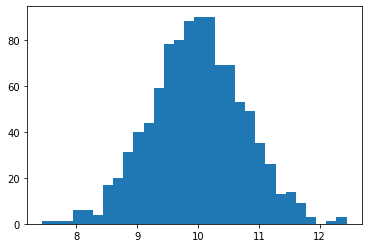

In [125]:
means=[]

for i in range(1000):
    h = np.random.randint(1, 20, 50) #выборка размером 50 с 20 дискретными значениями
    means.append(h.mean())
    
plt.hist(means, bins=30);

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

1. python

In [32]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [140]:
np.linalg.eig(m) #собственные значения и собственные вектора

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

2. на бумаге

In [25]:
x = sym.Symbol('x')
y = sym.Symbol('y')
l = sym.Symbol('lambda')

Берем исходную матрицу и записываем ее определитель, вычитая y из чисел главной диагонали

In [174]:
sym.Matrix([[1-l, 4],
            [1, 1- l]
])

Matrix([
[1 - lambda,          4],
[         1, 1 - lambda]])

Раскроем определитель и решим уравнение

In [146]:
(1-l)*(1-l) - 1*4

(1 - y)**2 - 4

In [176]:
1 - 2*l + l**2  - 4

lambda**2 - 2*lambda - 3

In [168]:
D = 2**2 - 4*1*(-3) # дискриминант
D

16

In [165]:
l_1 = (-2 + math.sqrt(D))/2 # 1 собственное число
l_1

1.0

In [178]:
l_2 = (-2 - math.sqrt(D))/2 # 2 собственное число
l_2

-3.0

Для нахождения собственных векторов необходимо подставить собственные числа в матрицу

In [26]:
sym.Matrix([[1-l, 4],
            [1, 1- l]
])

Matrix([
[1 - lambda,          4],
[         1, 1 - lambda]])

И приравнять к нулю

(1-1)x + 4y = 0  
1x + (1-1)y = 0

получается:  
4y = 0  
x = 0

При решении руками получается, что линейной зависимости нет, что является ошибкой